In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt

## Find causal structures in data

In [2]:
data_path = r'data/causal_inference'

<AxesSubplot:>

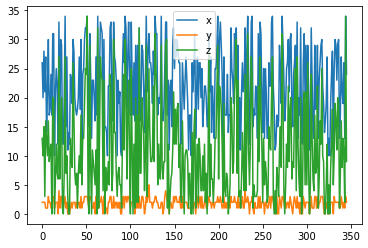

In [3]:
file_path = os.path.join(data_path, r'ic_mask.csv')
data = pd.read_csv(file_path)

data.plot()


    we see that x is more closely related to z than y
    y is more closely related to x than z
    z is more closely related to x than y

    seems like there is a link between x & y and x & z

    => Y <- X -> Z fork
    or => Y -> X -> Z
    


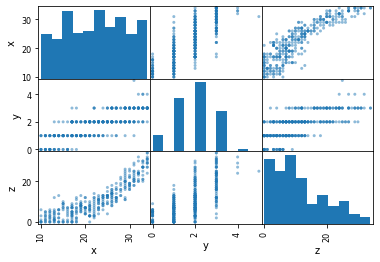

In [4]:
pd.plotting.scatter_matrix(data)
print(
    """
    we see that x is more closely related to z than y
    y is more closely related to x than z
    z is more closely related to x than y

    seems like there is a link between x & y and x & z

    => Y <- X -> Z fork
    or => Y -> X -> Z
    """
)

In [5]:
data.corr()

,x,y,z
x,1.000000,0.783980,0.883093
y,0.783980,1.000000,0.683881
z,0.883093,0.683881,1.000000


## Berkson's bias - causal structures in hospital data


    is the association between diseases?

    there is a negative correlation between accident and heart disease
    there is a slightly less strong negative correlation between lung cancer and heart disease
    pneumonia not really associated with any disease (slightly negative corr with heart disease)
    heart disease seems to be negatively associated with all other diseases
    accident is associated with other diseases too
    


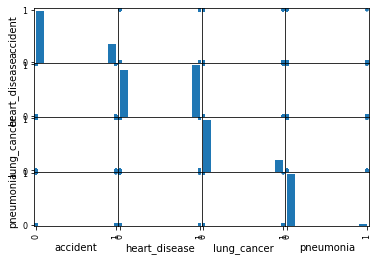

In [6]:
file_path = os.path.join(data_path, 'hospital_data.csv')
data = pd.read_csv(file_path)

data.drop(data.columns[0:2], inplace=True, axis=1) #drop first two

pd.plotting.scatter_matrix(data)

print(
    '''
    is the association between diseases?

    there is a negative correlation between accident and heart disease
    there is a slightly less strong negative correlation between lung cancer and heart disease
    pneumonia not really associated with any disease (slightly negative corr with heart disease)
    heart disease seems to be negatively associated with all other diseases
    accident is associated with other diseases too
    '''
)

In [7]:
data.corr()

,accident,heart_disease,lung_cancer,pneumonia
accident,1.000000,-0.607007,-0.276628,-0.114578
heart_disease,-0.607007,1.000000,-0.488700,-0.198596
lung_cancer,-0.276628,-0.488700,1.000000,-0.091234
pneumonia,-0.114578,-0.198596,-0.091234,1.000000


## Heart Attack Data

In [8]:
file_path = os.path.join(data_path, 'bbg.xlsx')
data = pd.read_excel(file_path)

data['Gender'] = np.where(data['Gender']=='M', 1, 0)

data.corr()

data.groupby('Drug').count()

,Gender,HeartAttack
Drug,,
0,60,60
1,60,60


In [9]:
males = data[data['Gender']==1]
males.corr()

,Drug,Gender,HeartAttack
Drug,1.0,NaN,0.1
Gender,NaN,NaN,NaN
HeartAttack,0.1,NaN,1.0


In [10]:
females = data[data['Gender']==0]
females.corr()

,Drug,Gender,HeartAttack
Drug,1.000000,NaN,0.047246
Gender,NaN,NaN,NaN
HeartAttack,0.047246,NaN,1.000000


In [12]:
print(
    '''
    would i recommend?

    there is a very slight negative association between drug and heart attack
    looking at males and females separately we seem to have positive association for both
    i would not recommend
    '''
)

data[['Drug','HeartAttack','Gender']].groupby(['Drug','Gender']).mean()


would i recommend?

there is a very slight negative association between drug and heart attack
looking at males and females separately we seem to have positive association for both
i would not recommend



HeartAttack
Drug Gender             
0    0             0.050
     1             0.300
1    0             0.075
     1             0.400

In [15]:
data[['Drug','Gender']].groupby(['Drug']).mean()

,Gender
Drug,
0,0.666667
1,0.333333


In [16]:
pd.crosstab(index=data['Drug'], columns = data['Gender'])

Gender,0,1
Drug,,
0,20,40
1,40,20


In [18]:
print(
    '''
    are people who are assigned the drug more or less likely to have a heart attack?

    heart attack rates fall from 0.217 to 0.183 in general
    but once you split for gender you see the rates actually are higher for those who are given the drug
    you would then have to say that they are more likely

    are men or women more likely to have heart attacks?

    men
    
    who is more likely to have been assigned the drug?

    women
    
    would you recommend the drug to either gender?

    no
    '''
)


    are people who are assigned the drug more or less likely to have a heart attack?

    heart attack rates fall from 0.217 to 0.183 in general
    but once you split for gender you see the rates actually are higher for those who are given the drug
    you would then have to say that they are more likely

    are men or women more likely to have heart attacks?

    men
    
    who is more likely to have been assigned the drug?

    women
    
    would you recommend the drug to either gender?

    no
    


In [19]:
model = LinearRegression()
model.fit(data[['Drug','Gender']], data['HeartAttack'])

drug_effect = model.coef_[0]
drug_effect #shows it is contributing to the heart attacks, not stopping them

0.0625

## Blood Pressure Data

In [21]:
file_path = os.path.join(data_path, 'drug_blood_pressure.xlsx')
data = pd.read_excel(file_path)
data['BloodPressure'] = np.where(data['BloodPressure']=='High', 1, 0)

data.corr()

,Drug,BloodPressure,HeartAttack
Drug,1.000000,-0.333333,-0.041667
BloodPressure,-0.333333,1.000000,0.333333
HeartAttack,-0.041667,0.333333,1.000000


In [22]:
data.groupby('Drug').count()

,BloodPressure,HeartAttack
Drug,,
0,60,60
1,60,60


In [23]:
data[['Drug','HeartAttack','BloodPressure']].groupby(['Drug','BloodPressure']).mean()

HeartAttack
Drug BloodPressure             
0    0                    0.050
     1                    0.300
1    0                    0.075
     1                    0.400

In [24]:
data[['Drug','BloodPressure']].groupby(['Drug']).mean()

,BloodPressure
Drug,
0,0.666667
1,0.333333


In [25]:
pd.crosstab(index=data['Drug'], columns = data['BloodPressure'])

BloodPressure,0,1
Drug,,
0,20,40
1,40,20


In [26]:
print(
    '''
    in this example, now we have the drug pointing causally to blood pressure
    in the previous gender was pointing to drug
    this means that we dont have to condition on blood pressure
    so we can look at the effect of the drug on heart attack we can remove the blood pressure from the model
    '''
)


    in this example, now we have the drug pointing causally to blood pressure
    in the previous gender was pointing to drug
    this means that we dont have to condition on blood pressure
    so we can look at the effect of the drug on heart attack we can remove the blood pressure from the model
    


In [27]:
model = LinearRegression()
model.fit(data[['Drug']], data['HeartAttack'])

drug_effect = model.coef_[0]
drug_effect

-0.033333333333333354

## Causality

In [28]:
file_path = os.path.join(data_path, 'xy.csv')
data = pd.read_csv(file_path)
data

,x,y
0,28.556905,83.316694
1,17.421222,49.560609
2,20.138262,51.080062
3,27.538580,85.149903
4,16.295949,55.420805
5,22.624887,54.459757
6,30.262816,93.974385
7,30.864895,99.176933
8,17.974629,51.089301
9,28.041581,83.440334


### 1. Visualise

<AxesSubplot:>

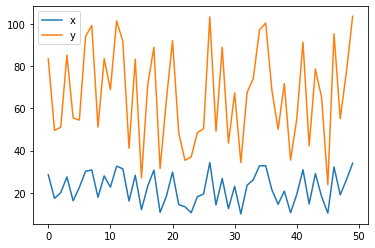

In [29]:
data.plot()

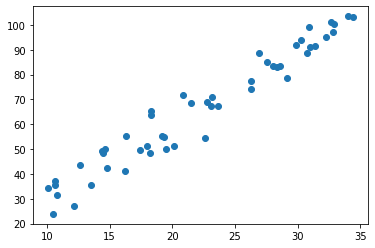

In [32]:
fig, ax = plt.subplots()
ax.scatter(data.x, data.y)
# seems to be a positive correlation between the two, pretty linear

### 2. see x change by 1 to see move in  y

In [33]:
model = LinearRegression()
model.fit(data[['x']],data['y'])

print('Model coef:', model.coef_)
print('Model intercept:', model.intercept_)

# if x increases by 1 unit then y would increase by 2.977 units

Model coef: [2.97739129]
Model intercept: 0.2819016175630509


## Ice Crime

In [34]:
file_path = os.path.join(data_path, 'ice_crime.csv')
data = pd.read_csv(file_path)
data

,crime,icecream_sales
0,2,1
1,3,29
2,1,7
3,1,0
4,1,8
...,...,...
360,1,13
361,2,10
362,1,2
363,3,34


### 1. Visualise

<AxesSubplot:>

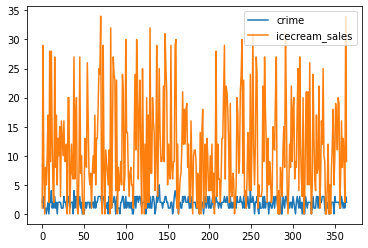

In [35]:
data.plot()

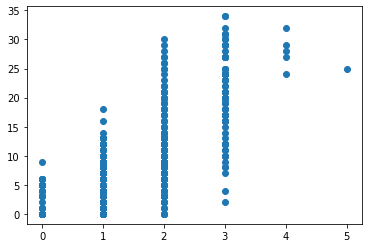

In [36]:
fig, ax = plt.subplots()
ax.scatter(data.crime, data.icecream_sales)

Mean crime:
                   crime
icecream_sales          
0               0.814815
1               0.923077
2               1.307692
3               1.222222
4               1.166667
5               0.800000
6               1.263158
7               1.520000
8               1.611111
9               1.631579
10              1.857143
11              1.833333
12              2.000000
13              1.800000
14              2.000000
15              2.250000
16              2.444444
17              2.571429
18              2.250000
19              2.500000
20              2.600000
21              2.500000
22              2.400000
23              2.800000
24              3.000000
25              3.000000
26              2.000000
27              2.875000
28              3.000000
29              3.000000
30              2.750000
31              3.000000
32              3.500000
34              3.000000


<AxesSubplot:xlabel='icecream_sales'>

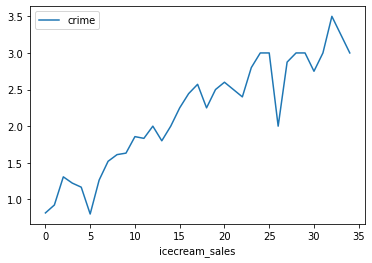

In [39]:
print(f"Mean crime:\n{data.groupby('icecream_sales').mean()}")
data.groupby('icecream_sales').mean().plot()

# we would expect crime to be 0, 1 or 2 with differing probabilities
# on average would expect 0.815